In [62]:
import glob
import os
import re
import pandas as pd
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

import skimage.transform
import scipy.ndimage
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data

import scipy.misc
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [109]:
INPUT_FOLDER_ORIGINAL = '/kaggle_2/luna/luna16/data/pre_processed_chunks/'
INPUT_FOLDER_NZ = '/kaggle_2/luna/luna16/data/pre_processed_chunks_nz/'
NUM_PATIENTS = 10
PATIENT_ANALYSIS_NUMBER = 5

In [91]:
X = []
X_NZ = []
ids = []
for patients in glob.glob(INPUT_FOLDER_ORIGINAL + '*_X.npy')[0:NUM_PATIENTS]:
    n = re.match('([a-f0-9].*)_X.npy', os.path.basename(patients))
    x = np.load(INPUT_FOLDER_ORIGINAL + n.group(0))
    x_nz = np.load(INPUT_FOLDER_NZ + n.group(0))
    X.append(x)
    X_NZ.append(x_nz)
    ids.append(n.group(1))
    print(n.group(1))
    

1.3.6.1.4.1.14519.5.2.1.6279.6001.404364125369979066736354549484
1.3.6.1.4.1.14519.5.2.1.6279.6001.200558451375970945040979397866
1.3.6.1.4.1.14519.5.2.1.6279.6001.801945620899034889998809817499
1.3.6.1.4.1.14519.5.2.1.6279.6001.235364978775280910367690540811
1.3.6.1.4.1.14519.5.2.1.6279.6001.149463915556499304732434215056
1.3.6.1.4.1.14519.5.2.1.6279.6001.241083615484551649610616348856
1.3.6.1.4.1.14519.5.2.1.6279.6001.173101104804533997398137418032
1.3.6.1.4.1.14519.5.2.1.6279.6001.142485715518010940961688015191
1.3.6.1.4.1.14519.5.2.1.6279.6001.297964221542942838344351735414
1.3.6.1.4.1.14519.5.2.1.6279.6001.272348349298439120568330857680


In [104]:
print(X[PATIENT_ANALYSIS_NUMBER].shape)
print(X_NZ[PATIENT_ANALYSIS_NUMBER].shape)
print(np.min(X[PATIENT_ANALYSIS_NUMBER]))
print(np.max(X[PATIENT_ANALYSIS_NUMBER]))
print(np.min(X_NZ[PATIENT_ANALYSIS_NUMBER]))
print(np.max(X_NZ[PATIENT_ANALYSIS_NUMBER]))

(16, 64, 64, 64)
(16, 64, 64, 64)
-1175
1652
-0.25
0.75


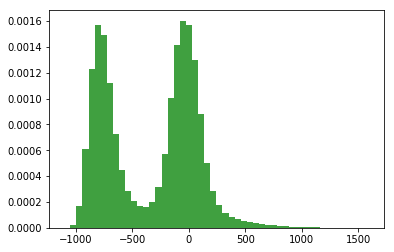

In [110]:
plt.hist(X[PATIENT_ANALYSIS_NUMBER].flatten(), 50, normed=1, facecolor='green', alpha=0.75)
plt.show()

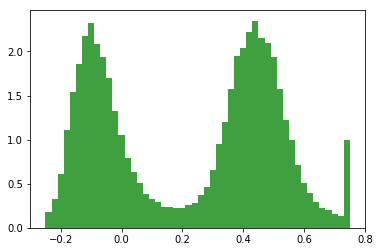

In [111]:
plt.hist(X_NZ[PATIENT_ANALYSIS_NUMBER].flatten(), 50, normed=1, facecolor='green', alpha=0.75)
plt.show()